## ECGR4105 - Final Project 

For the final project, a Fully Connected Neural Network will be implemented in addition to the Naive Bayes and the SVM Models.

This notebook includes code for the Fully Connected Neural Network implemented to train the data. 2 Layers, one input layer, and another output layer with 41 output classes were used along with Softmax.

In [72]:
# Importing all the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

import torch
torch.version.__version__
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import mean_squared_error
import time

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [73]:
# Code Snippet to Ignore and get rid of the Warnings
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Reading in the "dataset.csv" File.
ds = pd.read_csv('./dataset.csv')

# Replacing all the Nan values with a 0 as a place holder
ds.replace(np.nan, 0, inplace=True)

#Replacing all the Symptoms(Strings) into Integers,
#with each of the symptom having a unique integer  ranging from (1 to 134)
for col in ds.columns:
    ds.replace(('itching',' skin_rash',' nodal_skin_eruptions',' continuous_sneezing',' shivering',' chills',
                ' joint_pain',' stomach_pain',' acidity',' ulcers_on_tongue',' muscle_wasting',' vomiting',
                ' burning_micturition',' spotting_ urination',' fatigue',' weight_gain',' anxiety',
                ' cold_hands_and_feets',' mood_swings',' weight_loss',' restlessness',' lethargy',' patches_in_throat',
                ' irregular_sugar_level',' cough',' high_fever',' sunken_eyes',' breathlessness',' sweating',
                ' dehydration',' indigestion',' headache',' yellowish_skin',' dark_urine',' nausea',' loss_of_appetite',
                ' pain_behind_the_eyes',' back_pain',' constipation',' abdominal_pain',' diarrhoea',' mild_fever',
                ' yellow_urine',' yellowing_of_eyes',' acute_liver_failure',' fluid_overload',' swelling_of_stomach',
                ' swelled_lymph_nodes',' malaise',' blurred_and_distorted_vision',' phlegm',' throat_irritation',
                ' redness_of_eyes',' sinus_pressure',' runny_nose',' congestion',' chest_pain',' weakness_in_limbs',
                ' fast_heart_rate',' pain_during_bowel_movements',' pain_in_anal_region',' bloody_stool',
                ' irritation_in_anus',' neck_pain',' dizziness',' cramps',' bruising',' obesity',' swollen_legs',
                ' swollen_blood_vessels',' puffy_face_and_eyes',' enlarged_thyroid',' brittle_nails',
                ' swollen_extremeties',' excessive_hunger',' extra_marital_contacts',' drying_and_tingling_lips',
                ' slurred_speech',' knee_pain',' hip_joint_pain',' muscle_weakness',' stiff_neck',' swelling_joints',
                ' movement_stiffness',' spinning_movements',' loss_of_balance',' unsteadiness',
                ' weakness_of_one_body_side',' loss_of_smell',' badder_discomfort',' foul_smell_of urine',
                ' continuous_feel_of_urine',' passage_of_gases',' internal_itching',' toxic_look_(typhos)',' depression',
                ' irritability',' muscle_pain',' altered_sensorium',' red_spots_over_body',' belly_pain',
                ' abnormal_menstruation',' dischromic _patches',' watering_from_eyes',' increased_appetite',' polyuria',
                ' family_history',' mucoid_sputum',' rusty_sputum',' lack_of_concentration',' visual_disturbances',
                ' receiving_blood_transfusion',' receiving_unsterile_injections',' coma',' stomach_bleeding',
                ' distention_of_abdomen',' history_of_alcohol_consumption',' fluid_overload',' blood_in_sputum',
                ' prominent_veins_on_calf',' palpitations',' painful_walking',' pus_filled_pimples',' blackheads',
                ' scurring',' skin_peeling',' silver_like_dusting',' small_dents_in_nails',' inflammatory_nails',
                ' blister',' red_sore_around_nose',' yellow_crust_ooze',' prognosis',' bladder_discomfort'), 
               (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,22,23,24,25,26,27,28,29,30,31,
                32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,
                66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,
                100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134),
                inplace=True)


In [75]:
##Replacing all the Diseases(Strings) into Integers,
#with each of the disease having a unique integer  ranging from (1 to 41)
ds.Disease.replace(('Fungal infection','Allergy','GERD','Chronic cholestasis','Drug Reaction','Peptic ulcer diseae',
                    'AIDS','Diabetes ','Gastroenteritis','Bronchial Asthma','Hypertension ','Migraine',
                    'Cervical spondylosis','Paralysis (brain hemorrhage)','Jaundice','Malaria','Chicken pox','Dengue',
                    'Typhoid','hepatitis A','Hepatitis B','Hepatitis C','Hepatitis D','Hepatitis E',
                    'Alcoholic hepatitis','Tuberculosis','Common Cold','Pneumonia','Dimorphic hemmorhoids(piles)',
                    'Heart attack','Varicose veins','Hypothyroidism','Hyperthyroidism','Hypoglycemia',
                    'Osteoarthristis','Arthritis','(vertigo) Paroymsal  Positional Vertigo','Acne',
                    'Urinary tract infection','Psoriasis','Impetigo'),
                   (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
                    21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace=True)

In [76]:
# Print the data to check for any Discrepancies
ds.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,1,1,2,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,3,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,2,103,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# Printing the Shape of the Dataset
print(f"Numer of Rows(Cases): and Columns(Symptoms) in the dataset: {ds.shape}")

Numer of Rows(Cases): and Columns(Symptoms) in the dataset: (4920, 18)


In [78]:
# Printing the Full Information of the Dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Disease     4920 non-null   int64
 1   Symptom_1   4920 non-null   int64
 2   Symptom_2   4920 non-null   int64
 3   Symptom_3   4920 non-null   int64
 4   Symptom_4   4920 non-null   int64
 5   Symptom_5   4920 non-null   int64
 6   Symptom_6   4920 non-null   int64
 7   Symptom_7   4920 non-null   int64
 8   Symptom_8   4920 non-null   int64
 9   Symptom_9   4920 non-null   int64
 10  Symptom_10  4920 non-null   int64
 11  Symptom_11  4920 non-null   int64
 12  Symptom_12  4920 non-null   int64
 13  Symptom_13  4920 non-null   int64
 14  Symptom_14  4920 non-null   int64
 15  Symptom_15  4920 non-null   int64
 16  Symptom_16  4920 non-null   int64
 17  Symptom_17  4920 non-null   int64
dtypes: int64(18)
memory usage: 692.0 KB


In [79]:
# Printing NA values in each column
print("Display NA values in each Column:")
ds.isna().sum(axis = 0)

Display NA values in each Column:


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [80]:
## Printing NULL values in each Column
print("Display NULL values in each Column:")
ds.isnull().sum(axis = 0)

Display NULL values in each Column:


Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

In [81]:
# Shuffling the dataset to make sure the Data is randomly Shuffled
ds = ds.sample(frac = 1)

In [82]:
# Splitting the Data into 80% train and 20% test
train_dataset, temp_test_dataset = train_test_split(ds, test_size = 0.2)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(3936, 18)
(984, 18)


In [83]:
# Splitting the Testing_Dataset to 50% test and 50% validation
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size = 0.5)

print(test_dataset.shape)
print(valid_dataset.shape)

(492, 18)
(492, 18)


In [84]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train Dataset     : {train_dataset.shape}")
print(f"Test Dataset      : {test_dataset.shape}")
print(f"Validation Dataset: {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train Dataset     : (3936, 18)
Test Dataset      : (492, 18)
Validation Dataset: (492, 18)


In [85]:
# Statistics on the train datset. Process can be repeated for the Validation and Test Set too...
train_stats = train_dataset.describe()
train_stats.pop("Disease")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Symptom_1,3936.0,12.833079,16.324204,1.0,4.0,9.0,15.0,134.0
Symptom_2,3936.0,30.516006,30.275285,2.0,12.0,20.0,33.0,134.0
Symptom_3,3936.0,42.384146,34.407134,3.0,15.0,29.0,64.0,131.0
Symptom_4,3936.0,48.327744,36.036559,0.0,22.0,34.0,76.0,132.0
Symptom_5,3936.0,43.044970,39.534911,0.0,14.0,32.0,70.0,132.0
Symptom_6,3936.0,34.559197,37.474024,0.0,0.0,33.0,49.0,129.0
Symptom_7,3936.0,25.344004,32.201558,0.0,0.0,0.0,41.0,120.0
Symptom_8,3936.0,22.688516,31.395538,0.0,0.0,0.0,42.0,111.0
Symptom_9,3936.0,20.997205,32.037767,0.0,0.0,0.0,44.0,111.0
Symptom_10,3936.0,22.147866,36.246109,0.0,0.0,0.0,44.0,112.0


In [86]:
# Popping the 1st Column and Saving it to separate Variables
train_labels1 = train_dataset.pop("Disease")
test_labels1 = test_dataset.pop("Disease")
valid_labels1 = valid_dataset.pop("Disease")

In [87]:
# Encoding the Labels
train_labels = pd.get_dummies(train_labels1, prefix = "Disease")
test_labels = pd.get_dummies(test_labels1, prefix = "Disease")
valid_labels = pd.get_dummies(valid_labels1, prefix = "Disease")

train_labels

,Disease_1,Disease_2,Disease_3,Disease_4,Disease_5,Disease_6,Disease_7,Disease_8,Disease_9,Disease_10,Disease_11,Disease_12,Disease_13,Disease_14,Disease_15,Disease_16,Disease_17,Disease_18,Disease_19,Disease_20,Disease_21,Disease_22,Disease_23,Disease_24,Disease_25,Disease_26,Disease_27,Disease_28,Disease_29,Disease_30,Disease_31,Disease_32,Disease_33,Disease_34,Disease_35,Disease_36,Disease_37,Disease_38,Disease_39,Disease_40,Disease_41
4345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4235,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2514,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
395,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4574,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [88]:
# Defining a Function to Normalize the Datase
def norm(x):
    return (x - train_stats["mean"]) / train_stats["std"]
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_data = norm(valid_dataset)

In [89]:
# Normalized Data
normed_train_data.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
4345,-0.663621,-0.149165,2.546444,2.294122,2.250037,-0.922217,-0.787043,-0.722667,-0.655389,-0.611041,-0.52705,-0.393434,-0.315963,-0.239264,-0.205921,-0.195238,-0.115693
4235,1.541694,0.907803,0.628238,0.462648,1.086509,-0.922217,-0.787043,-0.722667,-0.655389,-0.611041,-0.52705,-0.393434,-0.315963,-0.239264,-0.205921,-0.195238,-0.115693
2514,-0.051033,0.049017,1.325767,1.406135,-1.088784,-0.922217,-0.787043,-0.722667,-0.655389,-0.611041,-0.52705,-0.393434,-0.315963,-0.239264,-0.205921,-0.195238,-0.115693
395,-0.663621,-0.776739,2.430189,2.210873,2.174155,-0.922217,-0.787043,-0.722667,-0.655389,-0.611041,-0.52705,-0.393434,-0.315963,-0.239264,-0.205921,-0.195238,-0.115693
2933,-0.357327,-0.611588,-0.795886,-0.425339,-0.228784,0.011763,0.330916,0.551399,0.717990,-0.611041,-0.52705,-0.393434,-0.315963,-0.239264,-0.205921,-0.195238,-0.115693


In [69]:
# Declaration of a Function to create a Model
def build_model1_two_layers():
    model = Sequential()
    model.add(Dense(16, input_shape = (normed_train_data.shape[1],)))
    model.add(Dense(41, activation = "softmax"))
    
    learning_rate = 0.001
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss = "categorical_crossentropy",
                  optimizer = optimizer,
                  metrics = ["accuracy"])
    return model

epochs = 300
batch_size = 16

model = build_model1_two_layers()
print("Summary of this Model: ")
model.summary()

history = model.fit(normed_train_data,
                        train_labels,
                        batch_size = batch_size, 
                        epochs = epochs,
                        verbose = 1,
                        shuffle = True,
                        steps_per_epoch = int(normed_train_data.shape[0] / batch_size),
                        validation_data = (normed_valid_data, valid_labels), )

Summary of this Model: 
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                288       
                                                                 
 dense_9 (Dense)             (None, 41)                697       
                                                                 
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
246/246 [==============================] - 1s 2ms/step - loss: 3.8422 - accuracy: 0.0028 - val_loss: 3.7738 - val_accuracy: 0.0020
Epoch 2/300
246/246 [==============================] - 0s 2ms/step - loss: 3.7111 - accuracy: 0.0107 - val_loss: 3.6427 - val_accuracy: 0.0285
Epoch 3/300
246/246 [==============================] - 0s 2ms/step - loss: 3.5945 - accuracy: 0.0462 - val_loss: 3.5261 - val_accuracy: 0.0589

246/246 [==============================] - 1s 2ms/step - loss: 1.6350 - accuracy: 0.5165 - val_loss: 1.6460 - val_accuracy: 0.5142
Epoch 54/300
246/246 [==============================] - 1s 2ms/step - loss: 1.6191 - accuracy: 0.5201 - val_loss: 1.6295 - val_accuracy: 0.5163
Epoch 55/300
246/246 [==============================] - 1s 2ms/step - loss: 1.6036 - accuracy: 0.5315 - val_loss: 1.6133 - val_accuracy: 0.5285
Epoch 56/300
246/246 [==============================] - 1s 2ms/step - loss: 1.5885 - accuracy: 0.5292 - val_loss: 1.5975 - val_accuracy: 0.5285
Epoch 57/300
246/246 [==============================] - 1s 3ms/step - loss: 1.5738 - accuracy: 0.5353 - val_loss: 1.5820 - val_accuracy: 0.5224
Epoch 58/300
246/246 [==============================] - 1s 3ms/step - loss: 1.5594 - accuracy: 0.5511 - val_loss: 1.5670 - val_accuracy: 0.5386
Epoch 59/300
246/246 [==============================] - 1s 2ms/step - loss: 1.5453 - accuracy: 0.5534 - val_loss: 1.5525 - val_accuracy: 0.5407
Epoch

Epoch 110/300
246/246 [==============================] - 0s 2ms/step - loss: 1.0857 - accuracy: 0.7246 - val_loss: 1.0731 - val_accuracy: 0.7175
Epoch 111/300
246/246 [==============================] - 1s 3ms/step - loss: 1.0796 - accuracy: 0.7251 - val_loss: 1.0668 - val_accuracy: 0.7175
Epoch 112/300
246/246 [==============================] - 1s 3ms/step - loss: 1.0736 - accuracy: 0.7299 - val_loss: 1.0605 - val_accuracy: 0.7175
Epoch 113/300
246/246 [==============================] - 1s 3ms/step - loss: 1.0676 - accuracy: 0.7327 - val_loss: 1.0545 - val_accuracy: 0.7175
Epoch 114/300
246/246 [==============================] - 1s 4ms/step - loss: 1.0618 - accuracy: 0.7335 - val_loss: 1.0485 - val_accuracy: 0.7215
Epoch 115/300
246/246 [==============================] - 1s 5ms/step - loss: 1.0560 - accuracy: 0.7363 - val_loss: 1.0425 - val_accuracy: 0.7215
Epoch 116/300
246/246 [==============================] - 2s 7ms/step - loss: 1.0502 - accuracy: 0.7350 - val_loss: 1.0367 - val_ac

246/246 [==============================] - 1s 3ms/step - loss: 0.8282 - accuracy: 0.8140 - val_loss: 0.8108 - val_accuracy: 0.8008
Epoch 167/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8248 - accuracy: 0.7947 - val_loss: 0.8076 - val_accuracy: 0.8008
Epoch 168/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8214 - accuracy: 0.8044 - val_loss: 0.8043 - val_accuracy: 0.8028
Epoch 169/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8180 - accuracy: 0.8140 - val_loss: 0.8008 - val_accuracy: 0.8028
Epoch 170/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8147 - accuracy: 0.8183 - val_loss: 0.7977 - val_accuracy: 0.8028
Epoch 171/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8114 - accuracy: 0.8061 - val_loss: 0.7942 - val_accuracy: 0.8028
Epoch 172/300
246/246 [==============================] - 1s 3ms/step - loss: 0.8082 - accuracy: 0.8155 - val_loss: 0.7908 - val_accuracy: 0.7764

246/246 [==============================] - 1s 3ms/step - loss: 0.6759 - accuracy: 0.8430 - val_loss: 0.6596 - val_accuracy: 0.8293
Epoch 223/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6737 - accuracy: 0.8443 - val_loss: 0.6574 - val_accuracy: 0.8293
Epoch 224/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6716 - accuracy: 0.8468 - val_loss: 0.6553 - val_accuracy: 0.8293
Epoch 225/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6695 - accuracy: 0.8453 - val_loss: 0.6534 - val_accuracy: 0.8293
Epoch 226/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6674 - accuracy: 0.8427 - val_loss: 0.6511 - val_accuracy: 0.8293
Epoch 227/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6653 - accuracy: 0.8488 - val_loss: 0.6493 - val_accuracy: 0.8293
Epoch 228/300
246/246 [==============================] - 1s 3ms/step - loss: 0.6632 - accuracy: 0.8498 - val_loss: 0.6473 - val_accuracy: 0.8293

246/246 [==============================] - 1s 3ms/step - loss: 0.5761 - accuracy: 0.8702 - val_loss: 0.5636 - val_accuracy: 0.8496
Epoch 279/300
246/246 [==============================] - 1s 4ms/step - loss: 0.5745 - accuracy: 0.8750 - val_loss: 0.5624 - val_accuracy: 0.8476
Epoch 280/300
246/246 [==============================] - 1s 3ms/step - loss: 0.5731 - accuracy: 0.8686 - val_loss: 0.5607 - val_accuracy: 0.8496
Epoch 281/300
246/246 [==============================] - 1s 3ms/step - loss: 0.5716 - accuracy: 0.8686 - val_loss: 0.5594 - val_accuracy: 0.8496
Epoch 282/300
246/246 [==============================] - 1s 3ms/step - loss: 0.5702 - accuracy: 0.8699 - val_loss: 0.5579 - val_accuracy: 0.8496
Epoch 283/300
246/246 [==============================] - 1s 3ms/step - loss: 0.5688 - accuracy: 0.8692 - val_loss: 0.5564 - val_accuracy: 0.8496
Epoch 284/300
246/246 [==============================] - 1s 3ms/step - loss: 0.5673 - accuracy: 0.8753 - val_loss: 0.5551 - val_accuracy: 0.8537

In [45]:
print("Summary of the Results after Each Epoch: ")
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
hist.tail()

Summary of the Results after Each Epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
295,0.549336,0.882622,0.537948,0.867886,295
296,0.547990,0.884400,0.536737,0.878049,296
297,0.546692,0.891768,0.535302,0.876016,297
298,0.545330,0.896850,0.534216,0.869919,298
299,0.543964,0.885417,0.532651,0.876016,299


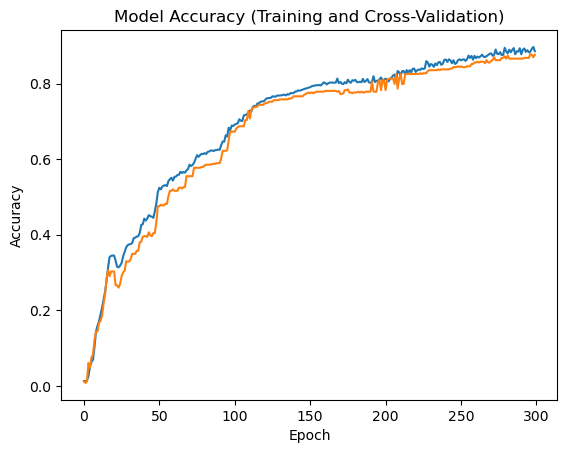

In [59]:
# Ploting the Traing Progress
acc = plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy (Training and Cross-Validation)")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [62]:
# Printing the Accuracy for Training, Validation and Testing Sets

print("Training Set: ")
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose = 1)
print("Accuracy : {:5.2f} ".format(accuracy))

print("Validation Set: ")
loss, accuracy = model.evaluate(normed_valid_data, valid_labels, verbose = 1)
print("Accuracy : {:5.2f} ".format(accuracy))

print("Testing Set: ")
loss, accuracy = model.evaluate(normed_test_data, test_labels, verbose = 1)
print("Accuracy : {:5.2f} ".format(accuracy))

Training Set: 
123/123 [==============================] - 0s 1ms/step - loss: 0.5423 - accuracy: 0.8991
Accuracy :  0.90 
Validation Set: 
16/16 [==============================] - 0s 2ms/step - loss: 0.5327 - accuracy: 0.8760
Accuracy :  0.88 
Testing Set: 
16/16 [==============================] - 0s 2ms/step - loss: 0.5613 - accuracy: 0.8943
Accuracy :  0.89 


16/16 [==============================] - 0s 1ms/step


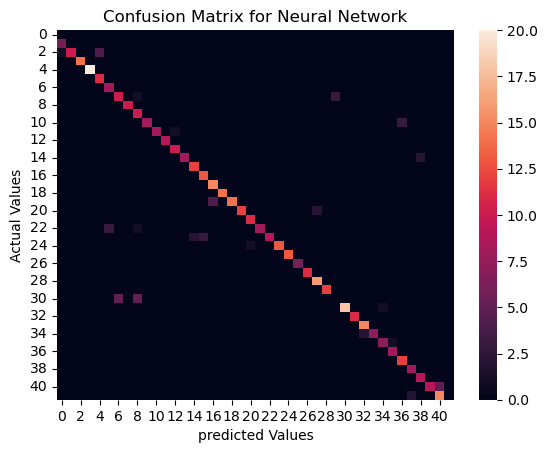

In [67]:
# Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_data)
predict_results = predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, ax = ax);

ax.set_xlabel("predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for Neural Network");